In [108]:
from scipy.io import loadmat
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import math

In [23]:
diabetes_mat = loadmat('diabetes.mat')
x_train = diabetes_mat['x_train']
y_train = diabetes_mat['y_train']
x_test = diabetes_mat['x_test']
y_test = diabetes_mat['y_test']

In [61]:
def GradDesc(X,Y,learnRate=0.01,epochs=500,reg=0):

    Weights=np.random.rand(X.shape[1])
    Weights=np.array(Weights)
    Weights=Weights.reshape(-1,1)
    
    m=X.shape[0]
    
    for i in range(epochs):
        
        predictions=np.matmul(X, Weights)
                
        Weights[0]=Weights[0]-(1/m)*learnRate*(np.matmul(X[:,0].transpose(),predictions-Y))
        
        for j in range(1,len(Weights)):
            Weights[j]=Weights[j]-(1/m)*learnRate*(np.matmul(X[:,j].transpose(),predictions-Y)+sum(np.dot(Weights[j],reg)))
            
    return(Weights)

In [71]:
def MSE(Y, X, Weights):
    Loss = 1/X.shape[0]*((Y-np.matmul(X, Weights))**2).sum()
    
    return Loss

In [62]:
x_train_scaled=scale(x_train, axis=0, with_mean=True, with_std=True, copy=True)
x_test_scaled=scale(x_test, axis=0, with_mean=True, with_std=True, copy=True)

addBias=np.ones([x_train_scaled.shape[0],1])
x_train_scaled=np.append(addBias,x_train_scaled,axis=1)

addBias=np.ones([x_test_scaled.shape[0],1])
x_test_scaled=np.append(addBias,x_test_scaled,axis=1)

In [113]:
reg_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
MSE_list = []
for i in reg_list:
    Weights = GradDesc(x_train_scaled, y_train, reg=i)
    Loss = MSE(y_test, x_test_scaled, Weights)
    MSE_list.append(Loss)
    print("lambda %.2f, MSE %s" % (math.log(i, 10), Loss))

lambda -5.00, MSE 2954.8453582534917
lambda -4.00, MSE 2954.0260421745616
lambda -3.00, MSE 2950.2313863498853
lambda -2.00, MSE 2954.2762191551983
lambda -1.00, MSE 2951.3093857564345
lambda 0.00, MSE 2952.2943199875726
lambda 1.00, MSE 2945.7783340804344


<BarContainer object of 7 artists>

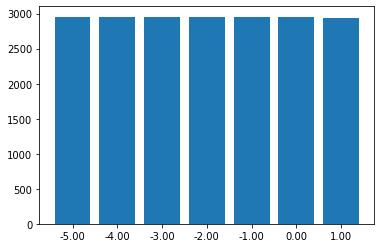

In [110]:
str_list = []
for i in reg_list:
    str_list.append("%.2f"%math.log(i, 10))
    
plt.bar(str_list, MSE_list)

In [114]:
kf = KFold(n_splits=5)

Mean_MSE_list = []
for i in reg_list:

    Loss_list = []
    for train_index, test_index in kf.split(x_train_scaled):
        x_train_set = x_train_scaled[train_index, :]
        y_train_set = y_train[train_index, :]

        Weights = GradDesc(x_train_set, y_train_set, reg=i)

        x_test_set = x_train_scaled[test_index, :]
        y_test_set = y_train[test_index, :]

        Loss = MSE(y_test_set, x_test_set, Weights)
        Loss_list.append(Loss)
    
    mean_loss = np.mean(Loss_list)
    Mean_MSE_list.append(mean_loss)
    print("lambda %.2f, MSE %s" % (math.log(i, 10), mean_loss))

lambda -5.00, MSE 4046.6167872401747
lambda -4.00, MSE 4039.8161475260304
lambda -3.00, MSE 4042.4238523784784
lambda -2.00, MSE 4044.3277739072532
lambda -1.00, MSE 4036.9773582876587
lambda 0.00, MSE 4015.0803666796373
lambda 1.00, MSE 3856.387777987378


<BarContainer object of 7 artists>

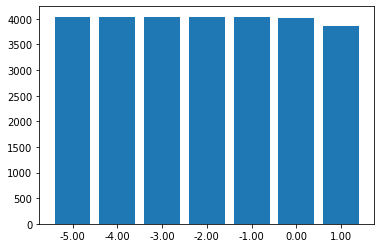

In [111]:
plt.bar(str_list, Mean_MSE_list)